In [1]:
# načtení dat
import pandas as pd

# reading the CSV file
data = pd.read_csv('All_N_rex 5 nm SR 895.csv', sep = ';', header = 0)
df = pd.DataFrame(data)

# vyber kompletnich
df.dropna(axis = 0, how = 'any', inplace = True)

# ulozim si labely abych je pak mohla nalepit
ROI = df.loc[:,"ROI name"]

# odstranim ty popisky
df= df.drop(columns = ['ROI name'])

# pruzkum sloupcu - ktere jsou vadne
"""for i in range(df.shape[1]):
    try:
        df.loc[:,df.columns[i]].astype(float)
    except ValueError as ve:
        print(df.columns[i])
 skoro vsechny - podivala jsem se v R u nekterych techu jsou tady hodnoty I.97... asi jsou to chybné values, vyhodim je, pak se zeptam Renci"""

 # pruzkum radku - ktere jsou vadne
bad_row = []
bad_row_counter = 0
for i in range(df.shape[0]):
    try:
        df.loc[i,:].astype(float)
    except ValueError as ve:
        bad_row_counter += 1
        bad_row.append(i)

"""86 radku obsahuje tady tuto chybu => vyhodim tyto radky (overime pak, jestli muzu)"""

# prilepit zpatky ROI

df['ROI'] = ROI

# odhodit radky kde je divnotyp
df = df.drop(bad_row)

# pretypovat
for i in range(3,97):
    try:
        df.loc[:,df.columns[i]] = df.loc[:,df.columns[i]].astype(float)
    except ValueError as ve:
        print(df.columns[i])

# rozdelit na barvicky
blue = df.loc[df['ROI'] == 'blue']
green = df.loc[df['ROI'] == 'green']
dry = df.loc[df['ROI'] == 'dry']
tech = df.loc[df['ROI'] == 'tech']
soil = df.loc[df['ROI'] == 'soil']

blue= blue.drop(columns = ['ROI'])
dry= dry.drop(columns = ['ROI'])
green= green.drop(columns = ['ROI'])
tech= tech.drop(columns = ['ROI'])
soil= soil.drop(columns = ['ROI'])

C:\Users\h337\AppData\Local\Temp/ipykernel_18200/2839327871.py:5: DtypeWarning: Columns (6,8,10,11,12,16,17,19,20,23,24,25,27,29,33,34,36,38,39,40,41,42,43,44,48,49,50,53,54,55,56,58,59,60,61,63,64,65,68,69,73,74,75,76,79,81,82,83,84,85,86,88,89,90,91,92,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('All_N_rex 5 nm SR 895.csv', sep = ';', header = 0)
C:\Users\h337\AppData\Local\Temp/ipykernel_18200/2839327871.py:47: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,df.columns[i]] = df.loc[:,df.columns[i]].astype(float)


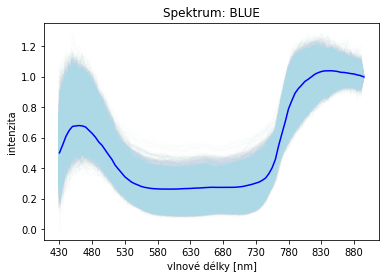

In [70]:
# MODRA SPEKTRA
import statistics as stat
xlabs = blue.columns[3:97]
med = []
for i in range(xlabs.size):
    med.append(stat.median(blue.loc[:,xlabs[i]]))

# data pro graf modry
blugr = blue.transpose()
blugr = blugr.iloc[3:97,:]
blugr['med'] = med
blugr['xlabs'] = xlabs
blugr

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.ylim(-0.2,1.2)
#plt.tight_layout()
for a in range(blugr.shape[1]-1) :
    plt.plot(xlabs, blugr.iloc[:, a], color = 'lightblue', alpha = 0.02)
plt.plot(xlabs, med, color = 'blue')
plt.xlabel('vlnové délky [nm]')
plt.ylabel('intenzita')
plt.title("Spektrum: BLUE")
ax.set_xticks([0,10,20,30,40,50,60,70,80,90])
plt.show()

# fig.savefig('BLUE.png', facecolor='w') # uložení
  




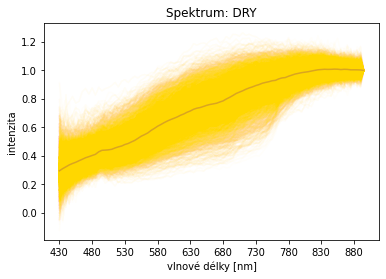

In [74]:
# DRY SPEKTRA
import statistics as stat
xlabs = dry.columns[3:97]
med = []
for i in range(xlabs.size):
    med.append(stat.median(dry.loc[:,xlabs[i]]))

# data pro graf dry
drygr = dry.transpose()
drygr = drygr.iloc[3:97,:]
drygr['med'] = med
drygr['xlabs'] = xlabs
drygr

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.ylim(-0.2,1.2)
#plt.tight_layout()
for a in range(drygr.shape[1]-1) :
    plt.plot(xlabs, drygr.iloc[:, a], color = 'gold', alpha = 0.02)
plt.plot(xlabs, med, color = 'goldenrod')
plt.xlabel('vlnové délky [nm]')
plt.ylabel('intenzita')
plt.title("Spektrum: DRY")
ax.set_xticks([0,10,20,30,40,50,60,70,80,90])
plt.show()

fig.savefig('DRY.png', facecolor='w') # uložení
  






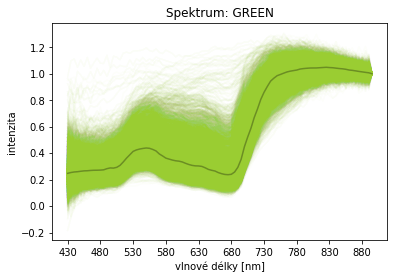

In [77]:
# GREEN SPEKTRA
import statistics as stat
xlabs = green.columns[3:97]
med = []
for i in range(xlabs.size):
    med.append(stat.median(green.loc[:,xlabs[i]]))

# data pro graf modry
gregr = green.transpose()
gregr = gregr.iloc[3:97,:]
gregr['med'] = med
gregr['xlabs'] = xlabs
gregr

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.ylim(-0.2,1.2)
#plt.tight_layout()
for a in range(gregr.shape[1]-1) :
    plt.plot(xlabs, gregr.iloc[:, a], color = 'yellowgreen', alpha = 0.02)
plt.plot(xlabs, med, color = 'olivedrab')
plt.xlabel('vlnové délky [nm]')
plt.ylabel('intenzita')
plt.title("Spektrum: GREEN")
ax.set_xticks([0,10,20,30,40,50,60,70,80,90])
plt.show()

fig.savefig('GREEN.png', facecolor='w') # uložení
  




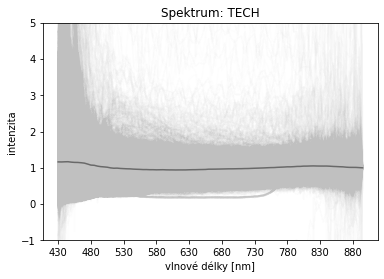

In [2]:
# TECH SPEKTRA
import statistics as stat
xlabs = tech.columns[3:97]
med = []
for i in range(xlabs.size):
    med.append(stat.median(tech.loc[:,xlabs[i]]))

# data pro graf modry
tecgr = tech.transpose()
tecgr = tecgr.iloc[3:97,:]
tecgr['med'] = med
tecgr['xlabs'] = xlabs
tecgr

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
plt.ylim(-1,5)
#plt.tight_layout()
for a in range(tecgr.shape[1]-1) :
    plt.plot(xlabs, tecgr.iloc[:, a], color = 'silver', alpha = 0.02)
plt.plot(xlabs, med, color = 'dimgrey')
plt.xlabel('vlnové délky [nm]')
plt.ylabel('intenzita')
plt.title("Spektrum: TECH")
ax.set_xticks([0,10,20,30,40,50,60,70,80,90])
plt.show()

fig.savefig('TECH.png', facecolor='w') # uložení
  




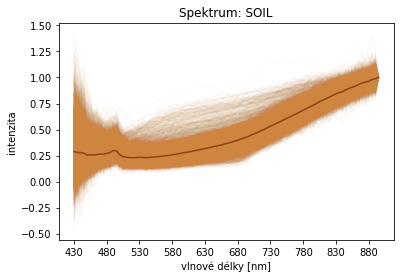

In [79]:
# SOIL SPEKTRA
import statistics as stat
xlabs = soil.columns[3:97]
med = []
for i in range(xlabs.size):
    med.append(stat.median(soil.loc[:,xlabs[i]]))

# data pro graf modry
soigr = soil.transpose()
soigr = soigr.iloc[3:97,:]
soigr['med'] = med
soigr['xlabs'] = xlabs
soigr

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

#plt.tight_layout()
for a in range(soigr.shape[1]-1) :
    plt.plot(xlabs, soigr.iloc[:, a], color = 'peru', alpha = 0.02)
plt.plot(xlabs, med, color = 'saddlebrown')
plt.xlabel('vlnové délky [nm]')
plt.ylabel('intenzita')
plt.title("Spektrum: SOIL")
ax.set_xticks([0,10,20,30,40,50,60,70,80,90])
plt.show()

fig.savefig('SOIL.png', facecolor='w') # uložení
  




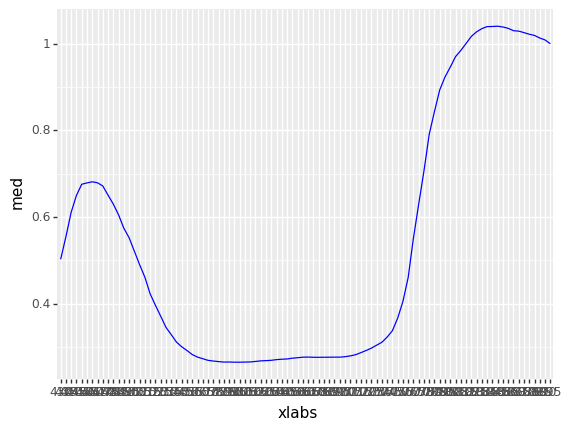

<ggplot: (160106382695)>

In [9]:
from plotnine import ggplot, aes, geom_line, facet_grid, labs, geom_col

# vykresli median
(
    ggplot(blugr)  # What data to use 
    + aes(x='xlabs', y='med', group = 1) # What variable to use
    + geom_line(color = 'blue')  # Geometric object to use for drawing
    #+ theme_xkcd()
)


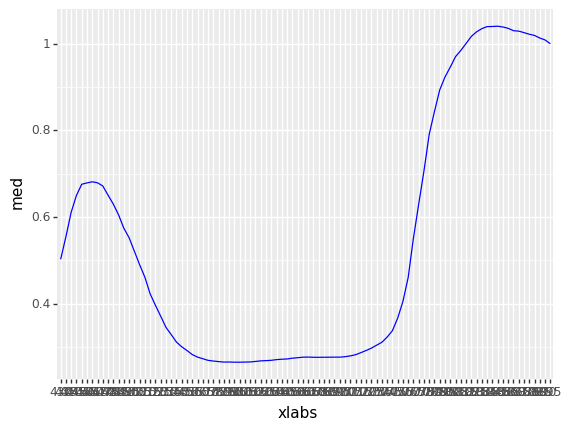

<ggplot: (144157616345)>

In [16]:
from plotnine import ggplot, aes, geom_line, facet_grid, labs, geom_col

# vykresli median
(
    ggplot(blugr)  # What data to use 
    + aes(x='xlabs', y='med', group = 1) # What variable to use
    + geom_line(color = 'blue')  # Geometric object to use for drawing
    #+ theme_xkcd()

)

In [20]:
xlabs.shape

(94,)

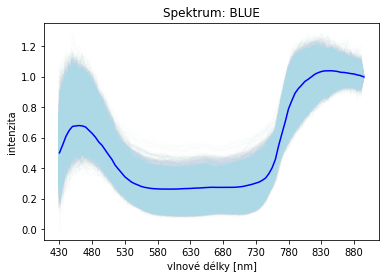

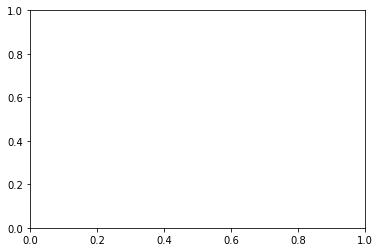

In [34]:
locs, labels = plt.xticks()

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

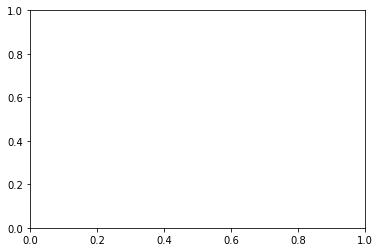

In [29]:
locs, labels = plt.xticks()

<AxesSubplot:xlabel='xlabs', ylabel='med'>

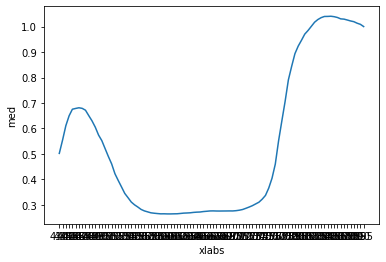

In [18]:
import seaborn as sns
sns.lineplot(data=blugr, x = 'xlabs', y='med')

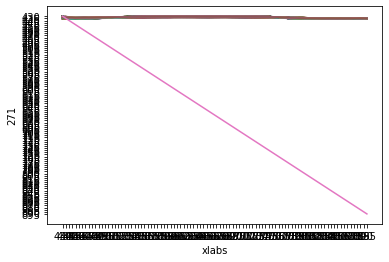

In [20]:
for sloupec in range(blugr.shape[1]):
    sns.lineplot(data=blugr,x = 'xlabs', y = blugr.iloc[:,sloupec])

In [19]:
blugr.shape

(94, 17907)

In [40]:
# popisky do grafu
labs = df.columns[4:]
labs

Index(['430', '435', '440', '445', '450', '455', '460', '465', '470', '475',
       '480', '485', '490', '495', '500', '505', '510', '515', '520', '525',
       '530', '535', '540', '545', '550', '555', '560', '565', '570', '575',
       '580', '585', '590', '595', '600', '605', '610', '615', '620', '625',
       '630', '635', '640', '645', '650', '655', '660', '665', '670', '675',
       '680', '685', '690', '695', '700', '705', '710', '715', '720', '725',
       '730', '735', '740', '745', '750', '755', '760', '765', '770', '775',
       '780', '785', '790', '795', '800', '805', '810', '815', '820', '825',
       '830', '835', '840', '845', '850', '855', '860', '865', '870', '875',
       '880', '885', '890', '895'],
      dtype='object')

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import statistics as stat

In [77]:
med = []
for i in range(len(labs)-1):
    med.insert(i,stat.median(blue[labs[i]]))
med

[0.502162317,
 0.554445678,
 0.610840698,
 0.649735171,
 0.675518536,
 0.67862068,
 0.681241952,
 0.678911654,
 0.671666449,
 0.650447864,
 0.629803082,
 0.60494884,
 0.574069955,
 0.552096732,
 0.520876877,
 0.489794436,
 0.46079173,
 0.422435921,
 0.396030836,
 0.370839423,
 0.345151543,
 0.328307719,
 0.311063641,
 0.300194013,
 0.291568826,
 0.282205675,
 0.276420416,
 0.272642501,
 0.268919327,
 0.267289696,
 0.265996951,
 0.264889331,
 0.26508173,
 0.264620838,
 0.264590965,
 0.264936362,
 0.265176276,
 0.266345023,
 0.26768206,
 0.268256522,
 0.268983479,
 0.270540828,
 0.271517454,
 0.272062479,
 0.273839684,
 0.274965357,
 0.276200944,
 0.276459976,
 0.276004509,
 0.275904937,
 0.276051962,
 0.276157534,
 0.276337168,
 0.276246601,
 0.277331137,
 0.279163673,
 0.281870926,
 0.286565368,
 0.291513442,
 0.296972336,
 0.303796604,
 0.310579705,
 0.32242084,
 0.337212468,
 0.366124436,
 0.404662638,
 0.460047038,
 0.551156816,
 0.629367617,
 0.706185055,
 0.790800559,
 0.843803999

In [70]:
stat.median(blue[labs[2]])

TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
blue = blue.drop(columns = ['ROI name'])

In [74]:
blue = blue.astype(float)

In [75]:
blue.dtypes

Tray      float64
File X    float64
File Y    float64
430       float64
435       float64
           ...   
875       float64
880       float64
885       float64
890       float64
895       float64
Length: 97, dtype: object